In [41]:
'''
2048 GAME PROJECT: Simple analysis of the DB data using pandas.

Date created:
    04/2022

Author:
    Filip J. Cierkosz
'''

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [42]:
# Connect with the DB and create a pandas dataframe for this purpose.
db = sqlite3.connect('./scores.db')
df = pd.read_sql_query("SELECT * FROM scores", db)

In [43]:
# Display the first 3 records from the DB.
df.head(3)

,id,grid_size,score,time_played_sec,date_played
0,0,3,8,2.50,06 Mar 2022 09:35:18 PM
1,1,3,8,3.12,06 Mar 2022 09:35:55 PM
2,2,3,32,37.50,06 Mar 2022 09:36:42 PM


In [44]:
# Display the last 3 records from the DB.
df.tail(3)

,id,grid_size,score,time_played_sec,date_played
113,113,4,512,683.04,02 Apr 2022 02:56:59 PM
114,114,3,64,69.06,06 Apr 2022 09:44:03 PM
115,115,4,128,81.26,06 Apr 2022 09:52:26 PM


In [45]:
# Calculate the mean for all grids.
df['score'].mean()

145.48275862068965

In [50]:
# Calculate the mean for 4x4 grid.
df4x4 = df[df['grid_size']==4]
df4x4['score'].mean()

302.08

In [54]:
# Calculate the median score for all grids (as integer).
df['score'].median().astype(int)

64

In [55]:
# Calculate the median score for 3x3 grid.
df3x3 = df[df['grid_size']==3]
df3x3['score'].median().astype(int)

64

In [56]:
# Calculate the standard deviation for the results.
df['score'].std()

407.8405588453413

In [57]:
# Calculate the standard deviation for the 4x4 grid.
df4x4 = df[df['grid_size']==4]
df4x4['score'].std()

281.41812308378434

In [58]:
# Count occurrences of different scores.
df.value_counts(['score'])

score
64       37
32       31
128      14
16        9
8         7
256       7
512       7
1024      2
4         1
4096      1
dtype: int64

In [59]:
# Count occurrences of different scores on 3x3 grid.
df3x3 = df[df['grid_size']==3]
df3x3.value_counts(['score'])

score
64       33
32       27
128      12
16        9
8         7
4         1
dtype: int64

In [60]:
# Get the mode for scores from all grids.
df['score'].mode()

0    64
Name: score, dtype: int64

In [63]:
# Get the average game time (seconds, 3 decimal places).
df['time_played_sec'].mean().round(decimals=3)

313.175

In [64]:
# Describe the dataset (excluding the 'id' column, as it would be meaningless).
fields = set(df.columns)-{'id'}
dfDesc = df[list(fields)]
dfDesc.describe()

,time_played_sec,grid_size,score
count,116.00,116.00,116.00
mean,313.18,3.26,145.48
std,"1,282.22",0.51,407.84
min,2.11,3.00,4.00
25%,39.71,3.00,32.00
50%,73.48,3.00,64.00
75%,151.26,3.00,128.00
max,"13,448.30",6.00,"4,096.00"


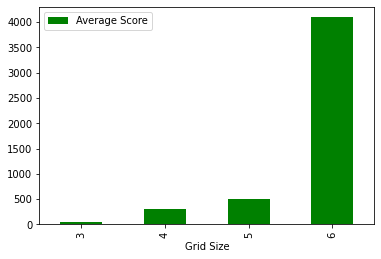

In [79]:
# Plot the diagram showing average scores on different grids.
data = {
    'Grid Size':[3,4,5,6],
    'Average Score':[
                        df[df['grid_size']==3]['score'].mean(),
                        df[df['grid_size']==4]['score'].mean(),
                        df[df['grid_size']==5]['score'].mean(),
                        df[df['grid_size']==6]['score'].mean()
                    ]
}
dfSc = pd.DataFrame(data, columns=['Grid Size','Average Score'])
dfSc.plot(x='Grid Size', y='Average Score', kind='bar', color='green')
plt.show()

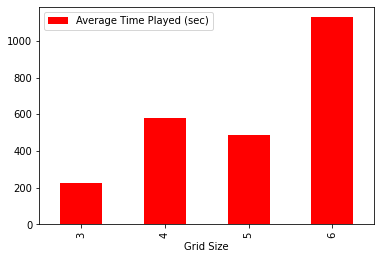

In [86]:
# Plot the diagram showing average time played on different grids.
data = {
    'Grid Size':[3,4,5,6],
    'Average Time Played (sec)':[
                        df[df['grid_size']==3]['time_played_sec'].mean(),
                        df[df['grid_size']==4]['time_played_sec'].mean(),
                        df[df['grid_size']==5]['time_played_sec'].mean(),
                        df[df['grid_size']==6]['time_played_sec'].mean()
                    ]
}
dfSc = pd.DataFrame(data,columns=['Grid Size','Average Time Played (sec)'])
dfSc.plot(x='Grid Size', y='Average Time Played (sec)', kind='bar',color='red')
plt.show()

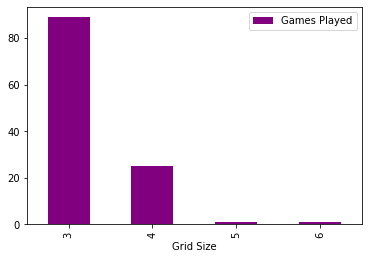

In [116]:
# Determine which grid is mostly used for games and represent it on a graph.
dataDict = df['grid_size'].value_counts().to_dict()
data = {
    'Grid Size':dataDict.keys(),
    'Games Played':dataDict.values()
}
dfSc = pd.DataFrame(data,columns=['Grid Size','Games Played'])
dfSc.plot(x='Grid Size', y='Games Played', kind='bar',color='purple')
plt.show()

<AxesSubplot:title={'center':'score'}, xlabel='grid_size'>

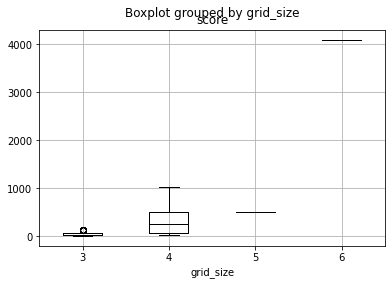

In [120]:
df.boxplot(by ='grid_size', column =['score'], color='black')

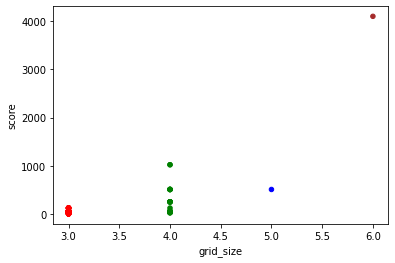

In [70]:
# Scatter diagram.
colors = {3:'red',4:'green',5:'blue',6:'brown'}
df['colors'] = df['grid_size'].map(colors)
df.plot.scatter(x='grid_size',y='score',color=df['colors']);

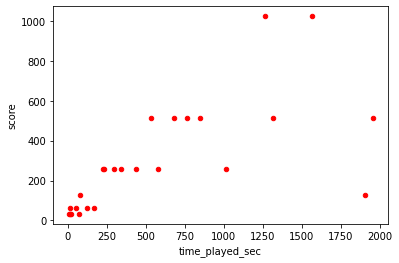

In [121]:
# Scatter diagram showing the relation between time played and obtained score for 4x4 grid.
df4x4 = df[df['grid_size']==4]
df4x4.plot.scatter(x='time_played_sec',y='score',color='red');

In [124]:
# Display only the records where the grid size is equal to 3 (exlude the column describing colors).
df3x3 = df[df['grid_size']==3]
df3x3.loc[:, df.columns!='colors']

,id,grid_size,score,time_played_sec,date_played
0,0,3,8,2.50,06 Mar 2022 09:35:18 PM
1,1,3,8,3.12,06 Mar 2022 09:35:55 PM
2,2,3,32,37.50,06 Mar 2022 09:36:42 PM
3,3,3,4,3.54,06 Mar 2022 09:36:58 PM
6,6,3,8,3.33,06 Mar 2022 10:59:43 PM
...,...,...,...,...,...
106,106,3,64,86.77,29 Mar 2022 11:30:15 PM
107,107,3,64,70.49,29 Mar 2022 11:31:35 PM
109,109,3,8,15.92,02 Apr 2022 02:14:49 PM
110,110,3,16,39.75,02 Apr 2022 02:15:39 PM
